# 案例：小费数据集

## 数据来源
- 小费数据集来源于Python第三方库seaborn（用于绘图）中自带的数据，加载该数据集：

In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import seaborn as sns # 导入seaborn库

In [2]:
tips = sns.load_dataset('tips')
tips.head() # head函数会返回前5条数据，也可指定返回数据行数
# total_bill列为消费总金额
# tip列为小费金额
# time列为聚餐的时间段
# size列为聚餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 定义问题
- 本次分析中，围绕小费数据集提出几个问题：小费金额与消费总金额是否存在相关性？性别、是否吸烟、星期几、中/晚餐、聚餐人数和小费金额是否有一定的关联？小费金额占消费总金额的百分比服从正态分布？

## 数据清洗
- 首先对数据进行简单描述，看是否有缺失值或者异常值：

In [3]:
tips.shape

(244, 7)

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


- 通过结果可以看出，总共有244条数据，通过统计暂时看不出是否有缺失值。通过打印数据的info信息可以看出每列数据的类型和缺失值，本例中的小费数据集没有缺失值：

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


## --数据探索
- 首先对小费金额tip与消费总金额total_bill进行分析，看看它们之间是否有关联：

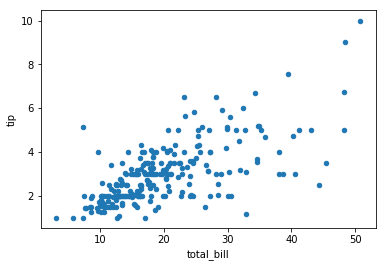

In [6]:
tips.plot(kind='scatter', x='total_bill', y='tip')

可以看出，小费金额与消费总金额存在着正相关的关系，即消费总金额越多，给的小费也越多。

- 再分析一下性别是否会影响消费的金额。这里使用柱状图，通过布尔选择男女性别，对小费数据进行平均后绘制柱状图：

In [7]:
male_tip = tips[tips['sex'] == 'Male']['tip'].mean()
male_tip

3.0896178343949052

In [8]:
female_tip = tips[tips['sex'] == 'Female']['tip'].mean()
female_tip

2.833448275862069

In [9]:
s = Series([male_tip, female_tip],index=['male','female'])
s

male      3.089618
female    2.833448
dtype: float64

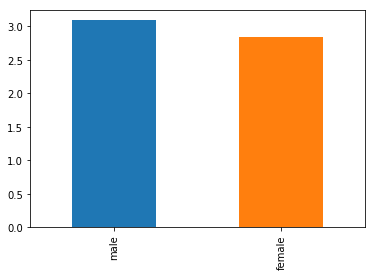

In [10]:
s.plot(kind='bar')

可以得出：女性小费金额少于男性小费金额

- 其他字段与小费的关系也是类似的方法。例如，日期与小费的关系，由于观察数据时只看到了前5行数据，通过unique函数可以看下日期的唯一值有哪些：

In [11]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [12]:
Thur_tip = tips[tips['day'] == 'Thur']['tip'].mean()
Thur_tip

2.771451612903226

In [13]:
Fri_tip = tips[tips['day'] == 'Fri']['tip'].mean()
Fri_tip

2.734736842105263

In [14]:
Sat_tip = tips[tips['day'] == 'Sat']['tip'].mean()
Sat_tip

2.993103448275862

In [15]:
Sun_tip = tips[tips['day'] == 'Sun']['tip'].mean()
Sun_tip

3.255131578947369

In [16]:
s = Series([Thur_tip, Fri_tip, Sat_tip, Sun_tip],index=['Thur','Fri','Sat','Sun'])
s

Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
dtype: float64

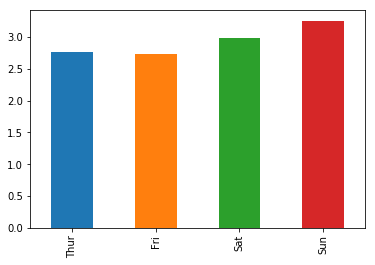

In [17]:
s.plot(kind='bar')

日期平均小费柱状图可以看出，周六、周日的小费比周四、周五的小费高

- 最后分析一下小费百分比的分布情况，这里的小费总金额为小费的金额和聚餐所花费的金额（total_bill），通过DataFrame算术运算，新建一列parcent_tip用于存储小费百分比：

In [18]:
tips['percent_tip'] = tips['tip']/(tips['total_bill']+tips['tip'])
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.056111
1,10.34,1.66,Male,No,Sun,Dinner,3,0.138333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.142799
3,23.68,3.31,Male,No,Sun,Dinner,2,0.122638
4,24.59,3.61,Female,No,Sun,Dinner,4,0.128014
5,25.29,4.71,Male,No,Sun,Dinner,4,0.157000
6,8.77,2.00,Male,No,Sun,Dinner,2,0.185701
7,26.88,3.12,Male,No,Sun,Dinner,4,0.104000
8,15.04,1.96,Male,No,Sun,Dinner,2,0.115294
9,14.78,3.23,Male,No,Sun,Dinner,2,0.179345


- 直方图如图，可以看出基本上符合正态分布，但也有几个异常点

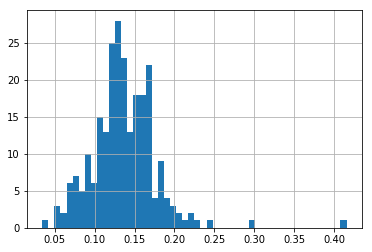

In [19]:
tips['percent_tip'].hist(bins=50)